In [51]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# read the contents of a zip file
import zipfile
with zipfile.ZipFile("hrdata.zip","r") as zip_ref:
    zip_ref.extractall("datafiles")

In [53]:
# read the contents of a csv file
df_bak = pd.read_csv(r"datafiles\HR.bak.csv")
df_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [54]:
# read the contents of a csv file
df = pd.read_csv(r"datafiles\HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [55]:
# review the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [56]:
# check for null values
df.isnull().sum()


satisfaction_level       2
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [57]:
# show the rows with null values
df_null = df[df.isnull().any(axis=1)]
df_null.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [59]:
# drop the rows with null values
df_drop = df.dropna()
# df_drop.info()
df = df_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   department             15000 non-null  object 
 9   salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### Data Preprocessing ###

<AxesSubplot:>

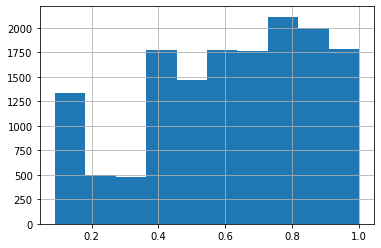

In [60]:
# check the distribution of satisfaction level
df["satisfaction_level"].hist()

In [22]:
# input values for missing satisfaction level
# df["satisfaction_level"].fillna(df["satisfaction_level"].median(), inplace=True)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15002 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [61]:
# display min/max values for each column
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612839,0.716081,3.802933,201.047467,3.498133,0.144600,0.238133,0.021267
std,0.248623,0.171183,1.232639,49.942671,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [62]:
# check values and counts of department
df["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
sale              1
Name: department, dtype: int64

In [63]:
# change department values = to sale to sales
df["department"].replace({"sale": "sales"}, inplace=True)
df["department"].value_counts()


sales          4141
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [64]:
# check value counts of salary
df["salary"].value_counts()

low       7316
medium    6446
high      1237
nme          1
Name: salary, dtype: int64

In [65]:
# convert department and salary to numeric values using get_dummies
df_dummies = pd.get_dummies(df, columns=["department", "salary"])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      15000 non-null  float64
 1   last_evaluation         15000 non-null  float64
 2   number_project          15000 non-null  int64  
 3   average_monthly_hours   15000 non-null  int64  
 4   time_spend_company      15000 non-null  int64  
 5   Work_accident           15000 non-null  int64  
 6   left                    15000 non-null  int64  
 7   promotion_last_5years   15000 non-null  int64  
 8   department_IT           15000 non-null  uint8  
 9   department_RandD        15000 non-null  uint8  
 10  department_accounting   15000 non-null  uint8  
 11  department_hr           15000 non-null  uint8  
 12  department_management   15000 non-null  uint8  
 13  department_marketing    15000 non-null  uint8  
 14  department_product_mng  15000 non-null

In [66]:
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# import scaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



In [67]:
# create and split the training and test sets
X = df_dummies.drop(['left'], axis=1)
y = df_dummies['left']
print("Shape: ", X.shape, y.shape)


Shape:  (15000, 21) (15000,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# create the regresion model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [70]:
# fit the model
classifier.fit(X_train, y_train)

C:\Users\benjy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.78925
Testing Data Score: 0.787


In [72]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [75]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[2148,  150],
       [ 489,  213]], dtype=int64)

In [76]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.787
